In [ ]:
import os                   # to interact with the operating system
import glob

import numpy as np
import pandas as pd
import xarray as xr

import pop_tools
import gsw                  # compute potential density

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cmocean.cm as cmo
import matplotlib.ticker as ticker

from matplotlib import animation, gridspec

ccrs = cartopy.crs

In [2]:
### load data

dmoc_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/dMOC_anomaly.nc'
anom_dmoc_ds = xr.open_dataarray(dmoc_file)

smoc_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/sMOC_anomaly.nc'
anom_smoc_ds = xr.open_dataset(smoc_file)

# Plot depth stream function

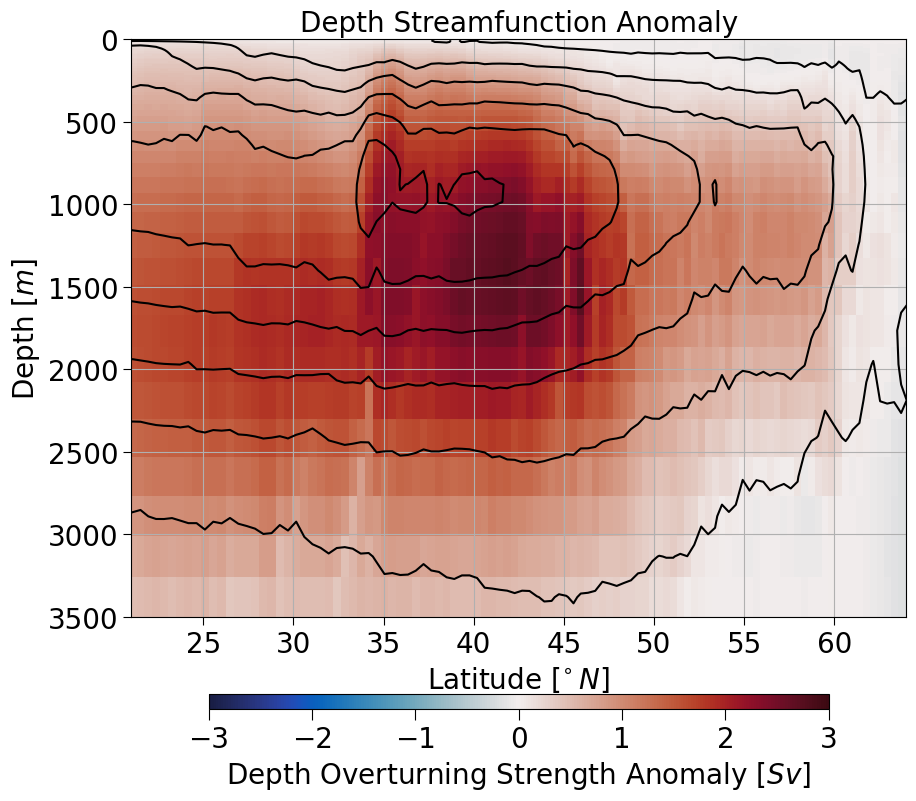

In [6]:
# Load data
dmoc_ds_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/dMOCcomposite-test.nc'
ps_file_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/temp_1231.001.nc'
dmoc_ds = xr.open_dataarray(dmoc_ds_path)
ds_ps = xr.open_dataset(ps_file_path).isel(time=0, nlon=0).squeeze()

# Replace NaN, Inf, and masked values in ULAT with a replacement value
replacement_value = 0
ds_ps['ULAT'] = xr.where(np.isnan(ds_ps['ULAT']) | np.isinf(ds_ps['ULAT']) | np.ma.getmask(ds_ps['ULAT']),
                         replacement_value, ds_ps['ULAT'])
# Convert z_t values to meters
ds_ps['z_t'] = ds_ps.z_t *1e-2

# Set arguments
vmin = -3
vmax = -vmin
labelsize = 20
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': 'Depth Overturning Strength Anomaly [$Sv$]', 'pad': 0.1}

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))
pc = ax.pcolormesh(ds_ps.ULAT, ds_ps.z_t, anom_dmoc_ds, 
                   cmap=cmo.balance, 
                   vmin=vmin, 
                   vmax=vmax)
plt.contour(ds_ps.ULAT, ds_ps.z_t, dmoc_ds.isel(time=slice(0, 40)).mean('time'), colors='k')
cbar = plt.colorbar(pc, **cbar_kwargs)
cbar.ax.xaxis.label.set_size(labelsize)
cbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)
ax.set_title('Depth Streamfunction Anomaly', fontsize=labelsize)
ax.invert_yaxis()
ax.set_xlim([21, 64])
ax.set_ylim([3500, 0])
plt.ylabel(r'Depth [$m$]', fontsize=labelsize)
plt.xlabel(r'Latitude [$^{\circ}\,N$]', fontsize=labelsize)
plt.grid()
plt.show()

#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'dmoc_anomaly.png', bbox_inches='tight', dpi=300, transparent=True)

# Plot density stream function

/tmp/ipykernel_92580/3657745266.py:48: UserWarning: The following kwargs were not used by contour: 'label'
  cp1 = plt.contour(ds_ps.ULAT.isel(nlat=(slice(250, 365))), fake_sigma,
/tmp/ipykernel_92580/3657745266.py:53: UserWarning: The following kwargs were not used by contour: 'label'
  cp2 = plt.contour(ds_ps.ULAT.isel(nlat=(slice(250, 365))), fake_sigma,


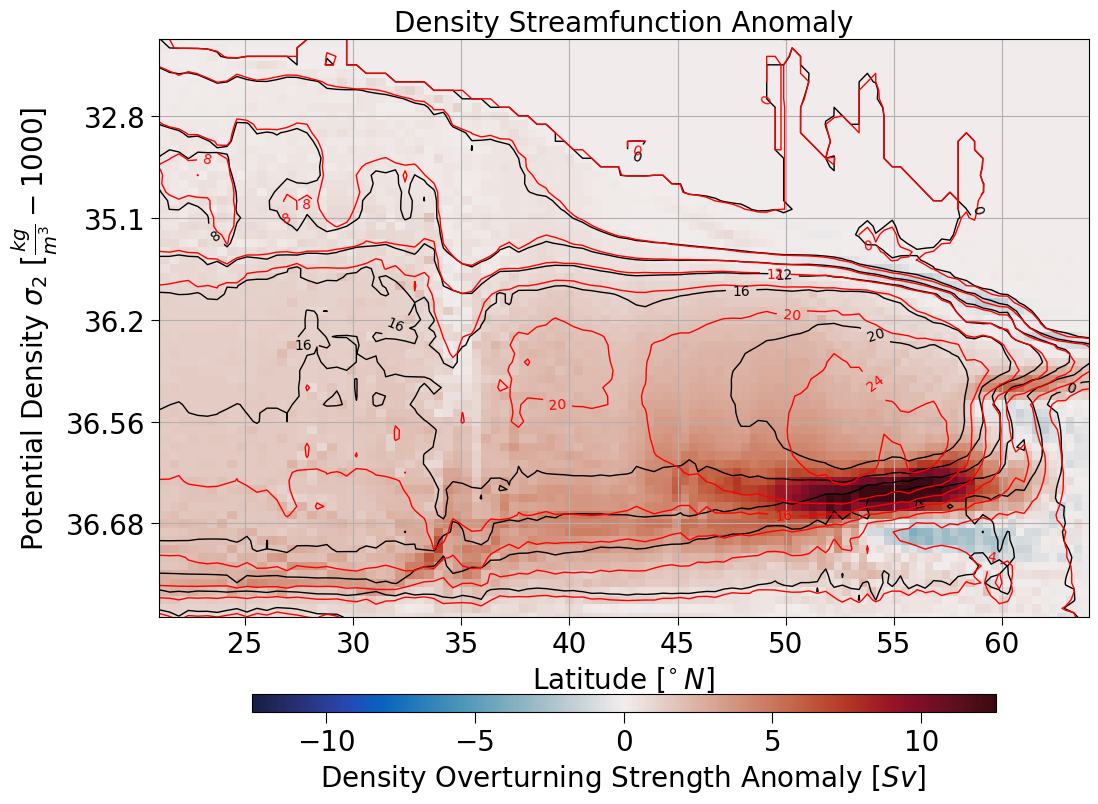

In [10]:
# Define file paths
smoc_ds_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/sMOCcomposite-test.nc'
temp_file_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/temp_1231.001.nc'

# Open datasets
smoc_ds = xr.open_dataset(smoc_ds_path)
ds_ps = xr.open_dataset(temp_file_path).isel(time=0, nlon=0).squeeze()

# Replace non-finite values and masked values in ULAT with a replacement value
replacement_value = 0
ds_ps['ULAT'] = xr.where(
    np.logical_or(np.isnan(ds_ps['ULAT']), np.isinf(ds_ps['ULAT']) | np.ma.getmask(ds_ps['ULAT'])),
    replacement_value,
    ds_ps['ULAT']
)

# Define colormap limits and sigma levels
vmin = -12.5
vmax = -vmin
sigma_level = [12., 16., 20., 24., 28., 28.5, 29.2, 29.4, 29.6, 29.8, 30., 30.2, 30.4, 30.6, 30.8, 31., 31.2, 31.4, 31.6, 31.8, 32., 32.2, 32.4, 32.6, 32.8, 33., 33.2, 33.4,
               33.6, 33.8, 34., 34.2, 34.4, 34.6, 34.8, 35., 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36, 36.1, 36.15, 36.2, 36.25, 36.3, 36.35,
               36.4, 36.42, 36.44, 36.46, 36.48, 36.5, 36.52, 36.54, 36.56, 36.57,
               36.58, 36.59, 36.6, 36.61, 36.62, 36.63, 36.64, 36.65, 36.66, 36.67, 36.68, 36.69, 36.7, 36.71, 36.72, 36.73, 36.74, 36.75, 36.76,
               36.78, 36.8, 36.82, 36.84, 36.86, 36.88, 36.9, 36.92, 36.94, 36.96, 36.98, 37., 37.02, 37.04, 37.06, 37.08, 37.1, 37.12,
               37.14, 37.16, 37.18, 37.2, 37.25, 37.3, 37.35, 37.4, 37.45, 37.6, 37.7, 37.8, 37.9, 38., 39., 40., 41., 42.]
fake_sigma = np.arange(len(sigma_level))

# Set label size
labelsize = 20

# Define colorbar keyword arguments
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': 'Density Overturning Strength Anomaly [$Sv$]', 'pad': 0.1}

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Plot pcolormesh
pc = ax.pcolormesh(ds_ps.TLAT.isel(nlat=(slice(250, 365))), fake_sigma, anom_smoc_ds.densMOC,
                   cmap=cmo.balance, vmin=vmin, vmax=vmax)

# Add colorbar
cbar = plt.colorbar(pc, **cbar_kwargs)
cbar.ax.xaxis.label.set_size(labelsize)
cbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)

# Plot contour
cp1 = plt.contour(ds_ps.ULAT.isel(nlat=(slice(250, 365))), fake_sigma,
            smoc_ds.densMOC.isel(time=slice(0, 40)).mean('time'),
            linewidths=1, colors='k', label='before')
ax.clabel(cp1, inline=True, fontsize=10)

cp2 = plt.contour(ds_ps.ULAT.isel(nlat=(slice(250, 365))), fake_sigma,
            smoc_ds.densMOC.isel(time=slice(41, 60)).mean('time'),
            linewidths=1, colors='red', label='before')
ax.clabel(cp2, inline=True, fontsize=10)


# Set tick parameters, title, limits, and labels
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)
ax.set_title('Density Streamfunction Anomaly', fontsize=labelsize)
plt.yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
ax.set_xlim([21, 64])
ax.set_ylim([15, 83])
plt.ylabel(r'Potential Density $\sigma_2$ [$\frac{kg}{m^3} -1000$]', fontsize=labelsize)
plt.xlabel(r'Latitude [$^{\circ}\,N$]', fontsize=labelsize)

# Invert y-axis and add grid
plt.gca().invert_yaxis()
plt.grid()

# Display the plot
plt.show()

# Plot stream functions at one latitude

## Depth stream function

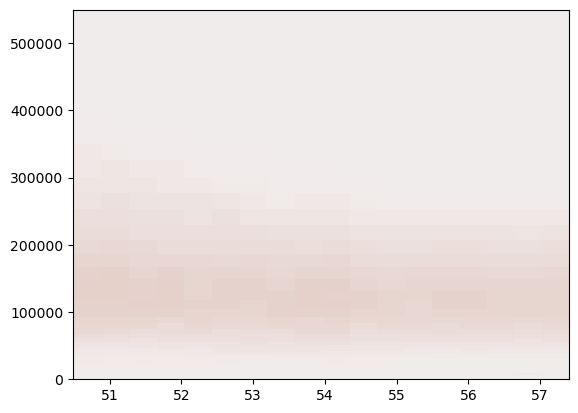

In [26]:
plt.pcolormesh(ds_ps.ULAT.isel(nlat=(slice(328, 346))), ds_ps.z_t, anom_dmoc_ds.isel(nlat=(slice(328, 346))), 
                   cmap=cmo.balance, 
                   vmin=vmin, 
                   vmax=vmax)

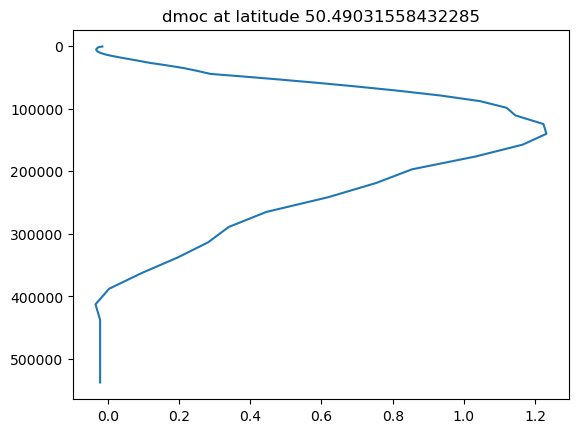

In [82]:
lat = ds_ps.TLAT.isel(nlat=(slice(328, 329))).values[0]
fig = plt.subplots()
plt.plot(anom_dmoc_ds.isel(nlat=(slice(328, 329))), ds_ps.z_t)
plt.title('dmoc at latitude {}'.format(lat))
plt.gca().invert_yaxis()
plt.show()

## Density stream function

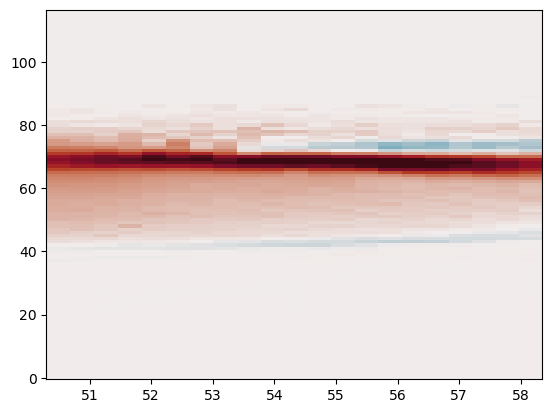

In [60]:
#plt.pcolormesh(ds_ps.TLAT.isel(nlat=(slice(328, 329))), fake_sigma, anom_smoc_ds.densMOC.isel(nlat=(slice(78, 79))),¨
plt.pcolormesh(ds_ps.TLAT.isel(nlat=(slice(328, 349))), fake_sigma, anom_smoc_ds.densMOC.isel(nlat=(slice(78, 99))),
                   cmap=cmo.balance, 
                   vmin=vmin, 
                   vmax=vmax)

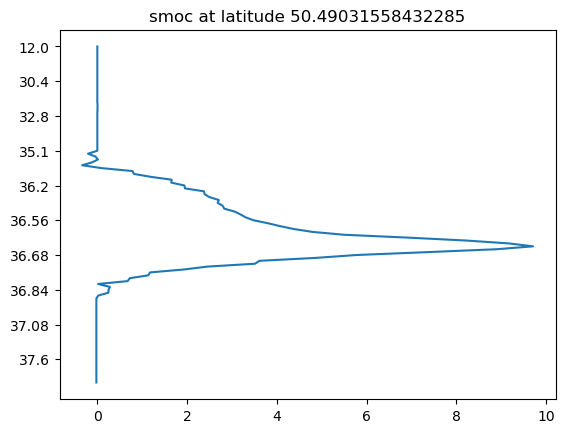

In [11]:
lat = ds_ps.TLAT.isel(nlat=(slice(328, 329))).values[0]

fig = plt.subplots()
plt.plot(anom_smoc_ds.densMOC.isel(nlat=(slice(78, 79))), fake_sigma)
plt.yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
plt.title('smoc at latitude {}'.format(lat))
plt.gca().invert_yaxis()
plt.show()

# Transport through section

## Climatology

In [2]:
ps_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/temp_1231.001.nc'

ds_ps = xr.open_dataset(ps_path).isel(time=0, nlon=0).squeeze()

# Replace non-finite values and masked values in ULAT with a replacement value
replacement_value = 0
ds_ps['ULAT'] = xr.where(
    np.logical_or(np.isnan(ds_ps['ULAT']), np.isinf(ds_ps['ULAT']) | np.ma.getmask(ds_ps['ULAT'])),
    replacement_value,
    ds_ps['ULAT']
)

In [3]:
vvel_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/VVELcomposite.nc'
vvel_da = xr.open_dataarray(vvel_file) # time: 60, z_t: 60nlat: 384, nlon: 320
vvel_da = vvel_da.mean('time')

sigma_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/SIGMA_2composite.nc'
sigma_da = xr.open_dataarray(sigma_file) # time: 60, z_t: 60nlat: 384, nlon: 320
sigma_da = sigma_da.mean('time')

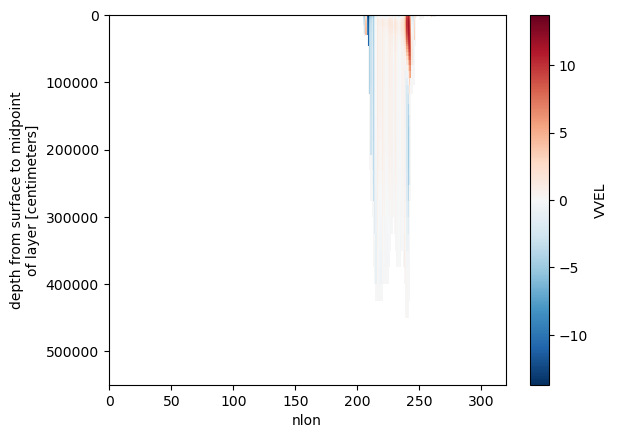

In [4]:
vvel_da.isel(nlat=(slice(328, 329))).plot(yincrease=False)

“the integrated transport across each subsection at each depth bin summed over the entire potential density range” ([Zhang and Thomas, 2021, p. 6](zotero://select/library/items/54KLX8N4)) 

In [5]:
d_transport = (vvel_da*1e-2 * ds_ps.DXU*1e-2 * ds_ps.dz*1e-2).sum(dim='nlon')

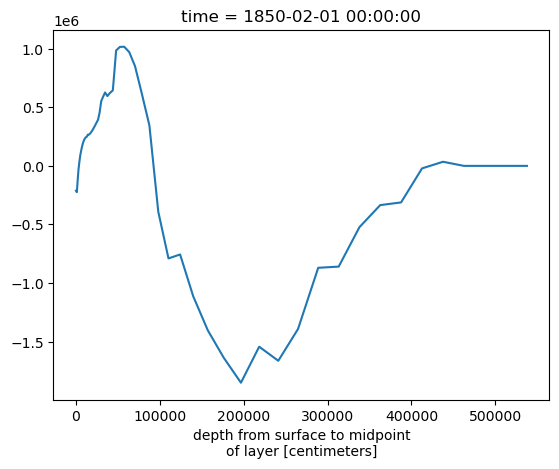

In [6]:
d_transport.isel(nlat=(slice(328, 329))).plot()

In [8]:
sigma_level = [12., 16., 20., 24., 28., 28.5, 29.2, 29.4, 29.6, 29.8, 30., 30.2, 30.4, 30.6, 30.8, 31., 31.2, 31.4, 31.6, 31.8, 32., 32.2, 32.4, 32.6, 32.8, 33., 33.2, 33.4,
               33.6, 33.8, 34., 34.2, 34.4, 34.6, 34.8, 35., 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36, 36.1, 36.15, 36.2, 36.25, 36.3, 36.35, 
               36.4, 36.42, 36.44, 36.46, 36.48, 36.5, 36.52, 36.54, 36.56, 36.57, 
               36.58, 36.59, 36.6, 36.61, 36.62, 36.63, 36.64, 36.65, 36.66, 36.67, 36.68, 36.69, 36.7, 36.71, 36.72, 36.73, 36.74, 36.75, 36.76, 
               36.78, 36.8, 36.82, 36.84, 36.86, 36.88, 36.9, 36.92, 36.94, 36.96, 36.98, 37., 37.02, 37.04, 37.06, 37.08, 37.1, 37.12, 
               37.14, 37.16, 37.18, 37.2, 37.25, 37.3, 37.35, 37.4, 37.45, 37.6, 37.7, 37.8, 37.9, 38., 39., 40., 41., 42.]
fake_sigma = np.arange(len(sigma_level))
min_lat = 250
max_lat = 365


s_transport = np.zeros([len(sigma_level), (max_lat - min_lat)])
for j in range(min_lat, max_lat):
    sigma_transport = np.zeros(len(sigma_level))
    v_transport = (vvel_da.isel(nlat=j)*1e-2  * ds_ps.dz*1e-2  * ds_ps.DXU.isel(nlat=j)*1e-2 ).values
    sigma_crossection = sigma_da.isel(nlat=j).values
    for i in range(len(sigma_level) - 1):
        ind = np.where((sigma_crossection >= sigma_level[i]) & (sigma_crossection < sigma_level[i + 1]))
        sigma_transport[i] = np.nansum(v_transport[ind])
    s_transport[:, j - min_lat] = sigma_transport[::-1]
    s_transport[:, j - min_lat] = s_transport[:, j - min_lat][::-1]
    

s_transport_da = xr.DataArray(s_transport,
                              dims=['sigma', 'nlat'], 
                              coords={'sigma': sigma_level,  
                                      'nlat': ds_ps.nlat.isel(nlat=slice(min_lat, max_lat))})
s_transport_da.name = 'sigma_transport'
    



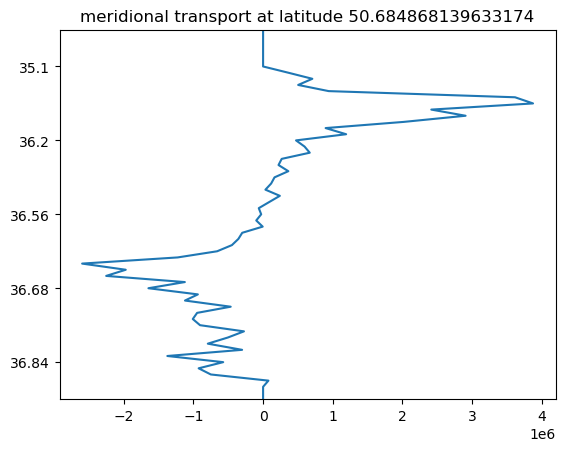

In [59]:
#lat = ds_ps.ULAT.isel(nlat=(slice(328, 329))).values[0]
lat = ds_ps.ULAT.isel(nlat=328).values

fig = plt.subplots()
plt.plot(s_transport_da.isel(nlat=78), fake_sigma)
plt.yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
plt.ylim(30,90)
plt.title('meridional transport at latitude {}'.format(lat))
plt.gca().invert_yaxis()
plt.show()

In [61]:
transport = np.zeros([len(sigma_level), len(ds_ps.dz), (max_lat - min_lat)])

for lat in range(min_lat, max_lat):
    
    # get density crosssection for latitude
    sigma_crossection = sigma_da.isel(nlat=lat).values
    
    lat_transport = np.zeros([len(sigma_level), len(ds_ps.dz)])
    
    for z in range(len(ds_ps.dz)):
        
        # compute transport per depth layer
        v_transport_z = (vvel_da.isel(nlat=lat, z_t=z)*1e-2  * ds_ps.dz.isel(z_t=z)*1e-2  * ds_ps.DXU.isel(nlat=lat)*1e-2 ).values
    
        for s in range(len(sigma_level) - 1):
    
            # find on which density layer transport takes place
            ind = np.where((sigma_crossection[z,:] >= sigma_level[s]) & (sigma_crossection[z,:] < sigma_level[s + 1]))

            if len(ind[0]) > 0:  # check if ind contains any elements
                lat_transport[s, z] = np.nansum(v_transport_z[ind])
            else:
                lat_transport[s, z] = np.nan

        transport[:, z, lat - min_lat] = lat_transport[::-1, z]
        transport[:, z, lat - min_lat] = transport[:, z, lat - min_lat][::-1]

 # Create coordinate arrays for latitude, depth, and sigma_level
latitudes = range(min_lat, max_lat)
depths = ds_ps.z_t.values
sigma_levels = range(len(sigma_level))

# Create the DataArray with appropriate dimensions and coordinates
transport_da = xr.DataArray(
    transport,
    dims=('sigma', 'depth', 'latitude'),
    coords={'sigma': sigma_levels, 'depth': depths, 'latitude': latitudes}
)

# Add metadata if needed
transport_da.attrs['long_name'] = 'Transport'
transport_da.attrs['units'] = 'm^3/s'

# Assign the values of sigma_level as labels for sigma_levels
#transport_da['sigma_level'] = ('sigma_level', sigma_level)

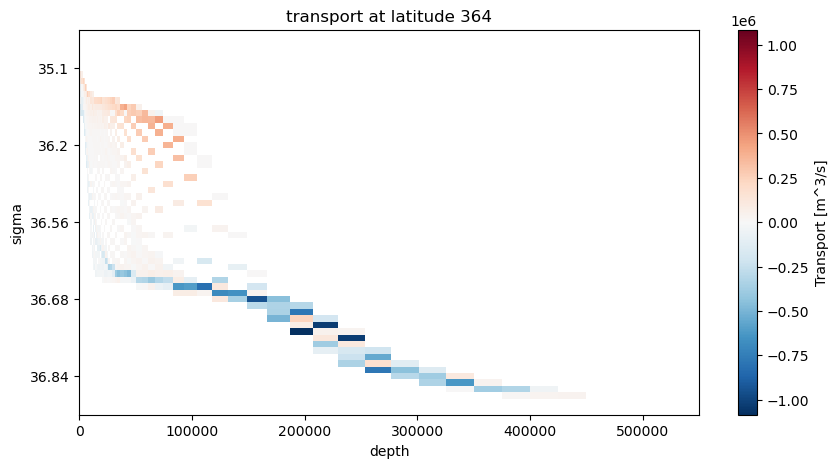

In [62]:
fig = plt.subplots(figsize=(10,5))
transport_da.isel(latitude=78).plot()
plt.yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
plt.ylim(30,90)
plt.title('transport at latitude {}'.format(lat))
plt.gca().invert_yaxis()
plt.show()

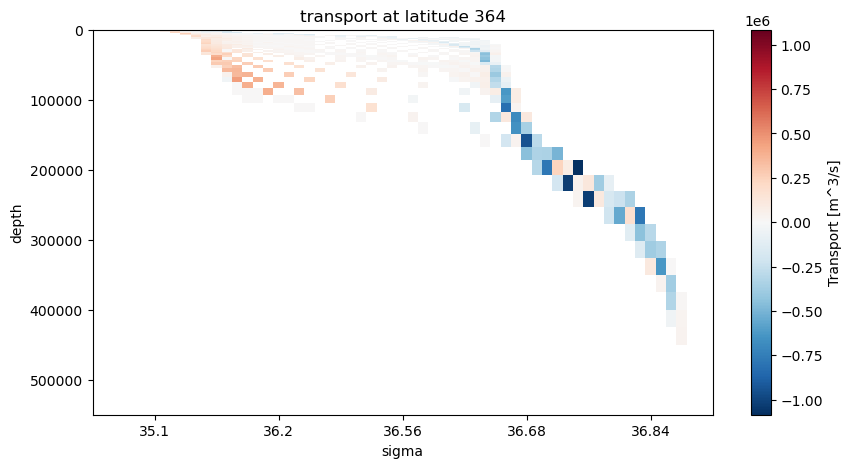

In [63]:
rotated_transport_da = transport_da.transpose('depth', 'sigma', 'latitude')

fig = plt.subplots(figsize=(10,5))
rotated_transport_da.isel(latitude=78).plot(yincrease=False)

plt.xticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
plt.xlim(30,90)
plt.title('transport at latitude {}'.format(lat))
#plt.gca().invert_xaxis()
plt.show()


## Anomaly

In [64]:
vvel_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/vvel_anomaly.nc'
anom_vvel_da = xr.open_dataarray(vvel_file)

In [65]:
anom_vvel_da

<xarray.DataArray 'VVEL' (z_t: 60, nlat: 384, nlon: 320)>
[7372800 values with dtype=float32]
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon

In [66]:
transport = np.zeros([len(sigma_level), len(ds_ps.dz), (max_lat - min_lat)])

for lat in range(min_lat, max_lat):
    
    # get density crosssection for latitude
    sigma_crossection = sigma_da.isel(nlat=lat).values
    
    lat_transport = np.zeros([len(sigma_level), len(ds_ps.dz)])
    
    for z in range(len(ds_ps.dz)):
        
        # compute transport per depth layer
        v_transport_z = (anom_vvel_da.isel(nlat=lat, z_t=z)*1e-2  * ds_ps.dz.isel(z_t=z)*1e-2  * ds_ps.DXU.isel(nlat=lat)*1e-2 ).values
    
        for s in range(len(sigma_level) - 1):
    
            # find on which density layer transport takes place
            ind = np.where((sigma_crossection[z,:] >= sigma_level[s]) & (sigma_crossection[z,:] < sigma_level[s + 1]))

            if len(ind[0]) > 0:  # check if ind contains any elements
                lat_transport[s, z] = np.nansum(v_transport_z[ind])
            else:
                lat_transport[s, z] = np.nan

        transport[:, z, lat - min_lat] = lat_transport[::-1, z]
        transport[:, z, lat - min_lat] = transport[:, z, lat - min_lat][::-1]
        
# Create coordinate arrays for latitude, depth, and sigma_level
latitudes = range(min_lat, max_lat)
depths = ds_ps.z_t.values
sigma_levels = range(len(sigma_level))

# Create the DataArray with appropriate dimensions and coordinates
anom_transport_da = xr.DataArray(
    transport,
    dims=('sigma', 'depth', 'latitude'),
    coords={'sigma': sigma_levels, 'depth': depths, 'latitude': latitudes}
)

# Add metadata if needed
anom_transport_da.attrs['long_name'] = 'Transport'
anom_transport_da.attrs['units'] = 'm^3/s'

# Assign the values of sigma_level as labels for sigma_levels
#transport_da['sigma_level'] = ('sigma_level', sigma_level)

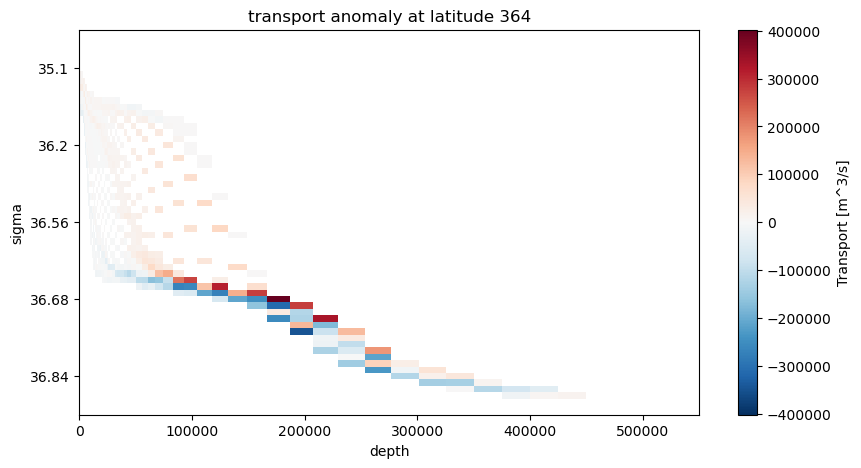

In [71]:
fig = plt.subplots(figsize=(10,5))
anom_transport_da.isel(latitude=78).plot()
plt.yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
plt.ylim(30,90)
plt.title('transport anomaly at latitude {}'.format(lat))
plt.gca().invert_yaxis()
plt.show()